<a href="https://colab.research.google.com/github/mmulll/CAISWinterProj/blob/main/WinterProjCAIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():
    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [24]:
!pip install transformers

In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emineyetm/fake-news-detection-datasets")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/emineyetm/fake-news-detection-datasets/versions/1


In [26]:
import os

folder_path = "/root/.cache/kagglehub/datasets/emineyetm/fake-news-detection-datasets/versions/1/News _dataset"
files = os.listdir(folder_path)
print(files)

['True.csv', 'Fake.csv']


In [27]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df_fake = pd.read_csv("/root/.cache/kagglehub/datasets/emineyetm/fake-news-detection-datasets/versions/1/News _dataset/Fake.csv", delimiter=',', header=None, names=['headline', 'body', 'subject', 'date'])
df_fake['fake_real'] = 0
num_rows = len(df_fake)
df_fake = df_fake.iloc[:num_rows // 2] # Half it

print('Number of fake articles: {:,}\n'.format(df_fake.shape[0]))

df_fake.sample(10)

Number of fake articles: 11,741



,headline,body,subject,date,fake_real
1340,White House Officials Push For Kushner To Ste...,Donald Trump keeps digging himself deeper and ...,News,"May 28, 2017",0
8639,This Deranged Michigan Congressman Thinks Dis...,Representative Justin Amash (R-Mich.) thinks t...,News,"January 20, 2016",0
650,Old Man On Vacation Angrily Live-Tweets Show ...,"Back in February to honor Black History Month,...",News,"August 7, 2017",0
848,Fox Host Goes After ‘Soulless’ Hillary Clinto...,Now that Donald Trump s Russia scandal has bee...,News,"July 15, 2017",0
2225,"The Russia Scandal EXPLODED In December, Impl...",Trump and his administration have been dogged ...,News,"March 8, 2017",0
3100,Meryl Streep DESTROYS Trump In EPIC And Power...,"Meryl Streep is an accomplished actress, phila...",News,"January 8, 2017",0
10544,JUDGE JEANINE NAILS THE UNHINGED LEFT: “The le...,Judge Jeanine nailed it tonight describing the...,politics,"Jun 25, 2017",0
54,"Trump’s Biggest KKK Fan Is Back, And He Just ...",Just in case you needed any more proof that Do...,News,"November 29, 2017",0
8117,Chuck Schumer DESTROYS Ted Cruz Over Vow To B...,Senator Chuck Schumer ( D- NY) is furious with...,News,"February 14, 2016",0
8078,Rachel Maddow’s Brilliant Breakdown Of The Co...,The unexpected passing of Justice Antonin Scal...,News,"February 16, 2016",0


In [53]:
# Load the dataset into a pandas dataframe.
df_real = pd.read_csv("/root/.cache/kagglehub/datasets/emineyetm/fake-news-detection-datasets/versions/1/News _dataset/True.csv", delimiter=',', header=None, names=['headline', 'body', 'subject', 'date'])
df_real['fake_real'] = 1
num_rows = len(df_real)
df_real = df_real.iloc[:num_rows // 2]

# remove the location in all caps and the reuters from the body text so the model doesn't rely on it
for index, row in df_real.iterrows():
  body = row["body"]
  reuters_index = body.find("Reuters")
  if reuters_index != -1:  # Ensure "Reuters" exists in the string
        df_real.at[index, "body"] = body[reuters_index:]
df_real["body"] = df_real["body"].str.replace("Reuters) - ", "")

print('Number of real articles: {:,}\n'.format(df_real.shape[0]))

df_real.sample(20)


Number of real articles: 10,709



,headline,body,subject,date,fake_real
10302,Obama's trip aims to make Cuba opening 'irreve...,President Barack Obama plans to lay out his vi...,politicsNews,"March 16, 2016",1
3934,Senate votes to repeal Labor Department rule o...,The U.S. Senate voted narrowly on Wednesday to...,politicsNews,"May 4, 2017",1
304,Trump ally Bannon campaigns for Moore in Alabama,A day after President Donald Trump endorsed U....,politicsNews,"December 6, 2017",1
5419,Key Senate committee chairman wants briefing o...,The Republican and Democratic leaders of the U...,politicsNews,"February 15, 2017",1
4525,Trump national security aides complete North K...,President Donald Trump’s top national security...,politicsNews,"April 2, 2017",1
9549,Exclusive: U.S. to renew most Myanmar sanction...,The United States plans to renew the bulk of i...,politicsNews,"May 13, 2016",1
9634,Exclusive: Top reason Americans will vote for ...,The U.S. presidential election may turn out to...,politicsNews,"May 6, 2016",1
4336,Trump ordered Syrian air strike before dinner ...,In a secure room at his Mar-a-Lago estate in F...,politicsNews,"April 7, 2017",1
7354,'Rage against the machine': U.S. voters reject...,"In a bitterly divisive presidential election, ...",politicsNews,"November 9, 2016",1
967,Trump likely to pick Fed's Powell to lead cent...,President Donald Trump is likely to pick Feder...,politicsNews,"October 30, 2017",1


In [54]:

df_full = pd.concat([df_fake, df_real], ignore_index=True)

df_full['full_text'] = df_full['headline'] + " " + df_full['body']

df = df_full.drop(['headline', 'body', 'subject', 'date'], axis=1)

print('Number of articles: {:,}\n'.format(df_full.shape[0]))

df_full.sample(10)

Number of articles: 22,450



,headline,body,subject,date,fake_real,full_text
20378,Trump says he would consider alliance with Rus...,Republican nominee Donald Trump said on Monday...,politicsNews,"July 25, 2016",1,Trump says he would consider alliance with Rus...
10369,CHEVY CHASE ADMITS To Using Position At SNL To...,Comedian Mark Dice explores the influence so-c...,politics,"Jul 18, 2017",0,CHEVY CHASE ADMITS To Using Position At SNL To...
13882,Trump on Twitter (Aug 16)- Manufacturing Counc...,Reuters has not edited the statements or confi...,politicsNews,"August 16, 2017",1,Trump on Twitter (Aug 16)- Manufacturing Counc...
9469,PANDA ‘PHOTOBOMBS’ MELANIA TRUMP On Trip to Be...,First Lady Melania Trump toured the Beijing Zo...,politics,"Nov 10, 2017",0,PANDA ‘PHOTOBOMBS’ MELANIA TRUMP On Trip to Be...
4884,Maine’s Horrible Governor Just Outright Decla...,"Paul LePage, who might as well be Maine s vers...",News,"August 26, 2016",0,Maine’s Horrible Governor Just Outright Decla...
7576,The Better Business Bureau Calls Trump Out As...,When someone else is trying to tell you that e...,News,"March 10, 2016",0,The Better Business Bureau Calls Trump Out As...
7724,8-Year-Old Dies Because Her ‘Extremely Religi...,A mother describing herself as extremely reli...,News,"March 3, 2016",0,8-Year-Old Dies Because Her ‘Extremely Religi...
4900,These 2 Orlando Hospitals Just Saved Pulse Ni...,The two Orlando-area hospitals that treated th...,News,"August 25, 2016",0,These 2 Orlando Hospitals Just Saved Pulse Ni...
21769,South Carolina bill aims to limit transgender ...,South Carolina lawmakers have introduced a mea...,politicsNews,"April 7, 2016",1,South Carolina bill aims to limit transgender ...
20913,"After Orlando shooting, Donald Trump reiterate...","Donald Trump, saying that he had predicted att...",politicsNews,"June 12, 2016",1,"After Orlando shooting, Donald Trump reiterate..."


In [30]:
# Get the texts and their labels
texts = df.full_text.values
texts = texts[1:] # drop the first (it was weird)
labels = df.fake_real.values
labels = labels[1:] # drop the first (it was weird)

In [31]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
# Using cased because that can contribute to accurate classification

Loading BERT tokenizer...


In [32]:
# Print the original text.
print(' Original: ', texts[0])

# Print the text split into tokens.
print('Tokenized: ', tokenizer.tokenize(texts[0]))

# Print the text mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(texts[0])))
print(len(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(texts[0]))))

 Original:   Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting

In [34]:
# Tokenize all of the sentences and map the tokens to their word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for text in texts:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        text,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 250,
                        truncation = True,          # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', texts[0])
print('Token IDs:', input_ids[0])

Original:   Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting 

In [35]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 80-10-10 train-validation-test split.

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(dataset))
val_size = (len(dataset) - train_size) // 2
test_size = len(dataset) - train_size - val_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))
print('{:>5,} test samples'.format(test_size))

17,959 training samples
2,245 validation samples
2,245 test samples


In [36]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here. For fine-tuning BERT on a specific task, the authors recommend a batch
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [37]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-cased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [38]:
# Define the optimizer
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate
                  eps = 1e-8 # args.adam_epsilon
                )

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [39]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4.
epochs = 2

# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [40]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [41]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [42]:
import random
import numpy as np

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss,
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 1 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # 0 the gradients
        model.zero_grad()

        # Forward pass, calculate logit predictions.
        # token_type_ids is the same as the "segment ids", which
        # differentiates sentence 1 and 2 in 2-sentence tasks.
        result = model(b_input_ids,
                       token_type_ids=None,
                       attention_mask=b_input_mask,
                       labels=b_labels,
                       return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the
        # output values prior to applying an activation function like the
        # softmax.
        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            result = model(b_input_ids,
                           token_type_ids=None,
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)


    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 2 ========
Training...
  Batch     1  of    562.    Elapsed: 0:00:03.
  Batch     2  of    562.    Elapsed: 0:00:04.
  Batch     3  of    562.    Elapsed: 0:00:05.
  Batch     4  of    562.    Elapsed: 0:00:07.
  Batch     5  of    562.    Elapsed: 0:00:08.
  Batch     6  of    562.    Elapsed: 0:00:09.
  Batch     7  of    562.    Elapsed: 0:00:10.
  Batch     8  of    562.    Elapsed: 0:00:11.
  Batch     9  of    562.    Elapsed: 0:00:13.
  Batch    10  of    562.    Elapsed: 0:00:14.
  Batch    11  of    562.    Elapsed: 0:00:15.
  Batch    12  of    562.    Elapsed: 0:00:16.
  Batch    13  of    562.    Elapsed: 0:00:18.
  Batch    14  of    562.    Elapsed: 0:00:19.
  Batch    15  of    562.    Elapsed: 0:00:20.
  Batch    16  of    562.    Elapsed: 0:00:21.
  Batch    17  of    562.    Elapsed: 0:00:23.
  Batch    18  of    562.    Elapsed: 0:00:24.
  Batch    19  of    562.    Elapsed: 0:00:25.
  Batch    20  of    562.    Elapsed: 0:00:26.
  Batch    21  of

In [44]:
import pandas as pd

pd.set_option('display.precision', 2)
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,2.60e-02,3.28e-05,1.0,0:13:12,0:00:34
2,6.09e-04,6.87e-04,1.0,0:13:18,0:00:34


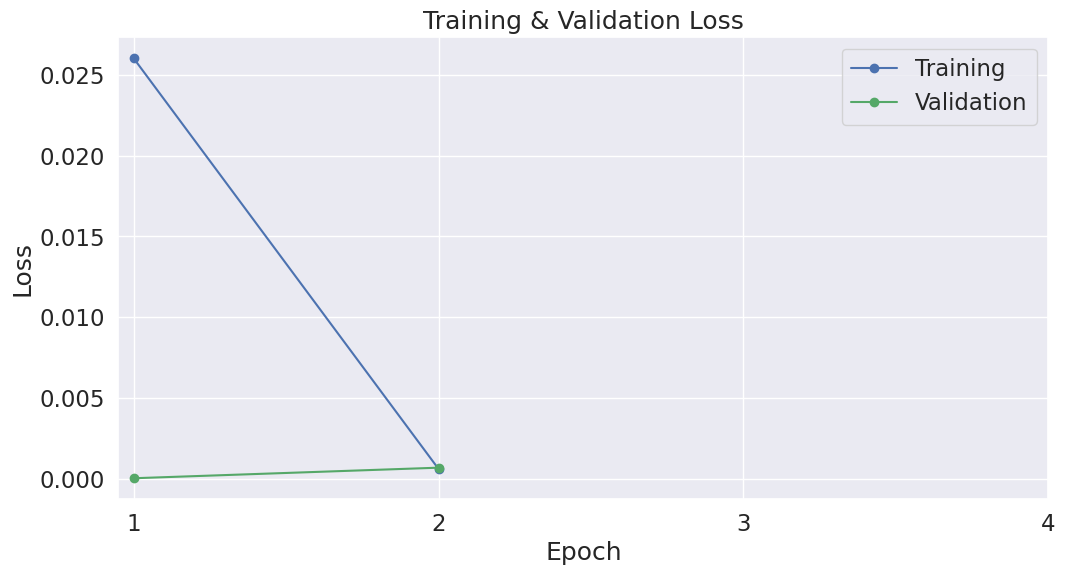

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [46]:
# Create the DataLoader.
prediction_sampler = SequentialSampler(test_dataset)
prediction_dataloader = DataLoader(test_dataset, sampler=prediction_sampler, batch_size=batch_size)

In [47]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids,
                     token_type_ids=None,
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 22,449 test sentences...
    DONE.


In [49]:
from sklearn.metrics import accuracy_score

# Convert logits to class predictions
flat_predictions = [np.argmax(logit, axis=1) for logit in predictions]
flat_predictions = np.concatenate(flat_predictions, axis=0)

# Flatten true labels
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate accuracy
accuracy = accuracy_score(flat_true_labels, flat_predictions)
print(f'Accuracy: {accuracy:.4f}')

print("Unique predicted labels:", np.unique(flat_predictions))
print("Unique true labels:", np.unique(flat_true_labels))

# Print all labels, ensuring its not all 0s or all 1s (100% accuracy?)
print("True Labels:", flat_true_labels[:100])
print("Predicted Labels:", flat_predictions[:100])


Accuracy: 1.0000
Unique predicted labels: [0 1]
Unique true labels: [0 1]
True Labels: [0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0]
Predicted Labels: [0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0]


In [50]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):

  # The predictions for this batch are a 2-column ndarray (one column for "0"
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()

  # Calculate and store the coef for this batch.
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


<ipython-input-51-a1af80ea924d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)


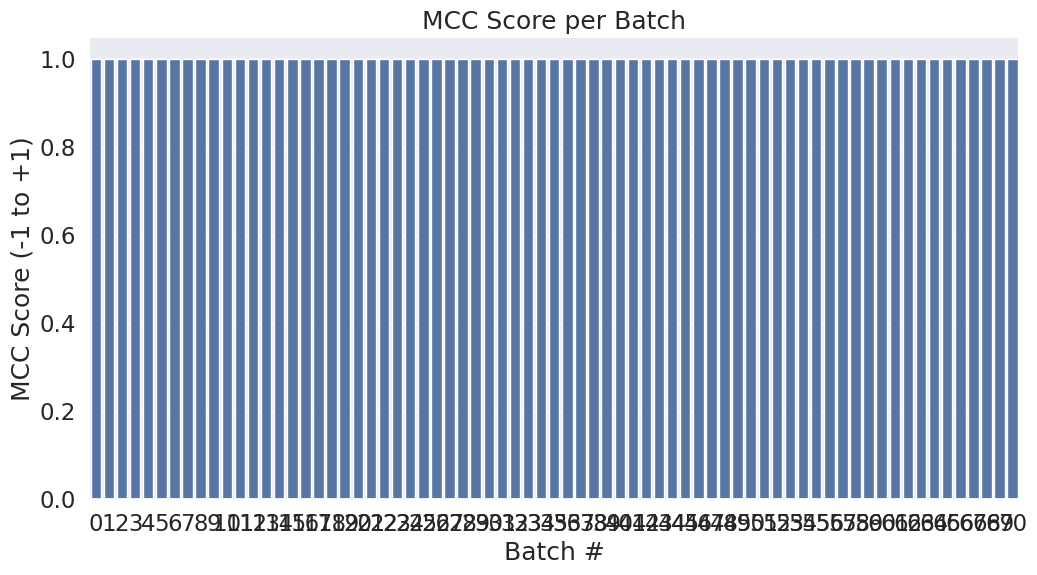

In [51]:
# Create a barplot showing the MCC score for each batch of test samples.
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [52]:
# Combine the results across all batches.
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 1.000
